## Run HDBSCAN algorithm on different sets of user features
- Baseline: users_fingerprint_norm
- Set 1a: user_embedding_svd_ability_seen_beh
- Set 1b: user_embedding_svd_ability_seen_beh_B
- Set 2a: user_embedding_svd512_ae128_plus_beh
- Set 2b: user_embedding_svd512_ae128_plus_beh_B
- Set 3: user_fingerprint_B_lex_clusters_scaled

In [1]:
import sys
sys.path.append("..")

%load_ext autoreload
%autoreload 2

### Load datasets

In [2]:
import pandas as pd

df_base = pd.read_csv("../../data/raw/users_fingerprint_norm.csv").set_index("user_id").drop(columns=["Unnamed: 0"])
df_1a = pd.read_csv("../../data/variants/user_embedding_svd_ability_seen_beh.csv").set_index("user_id")
df_1b = pd.read_csv("../../data/variants/user_embedding_svd_ability_seen_beh_B.csv").set_index("user_id")
df_2a = pd.read_csv("../../data/variants/user_embedding_svd512_ae128_plus_beh.csv").set_index("user_id")
df_2b = pd.read_csv("../../data/variants/user_embedding_svd512_ae128_plus_beh_B.csv").set_index("user_id")
df_3 = pd.read_csv("../../data/final/user_fingerprint_B_lex_clusters_scaled.csv").set_index("user_id").drop(columns=["Unnamed: 0"])

print(df_base.shape)
print(df_1a.shape)
print(df_1b.shape)
print(df_2a.shape)
print(df_2b.shape)
print(df_3.shape)

(2709, 5633)
(2709, 99)
(2709, 99)
(2709, 131)
(2709, 131)
(2709, 165)


In [7]:
import os
sys.path.append(os.path.abspath("../.."))
from src.evaluation.metrics import hopkins_statistic

for df in [df_base, df_1a, df_1b, df_2a, df_2b, df_3]:
    score = hopkins_statistic(df.values)
    print(f"Hopkins Statistic: {score:.4f}")

## ~= 0.5 means mostly noise, -> 0 means grid-like not good for density-based clustering, -> 1 strong peaks and valleys in density ~= good for clustering

Hopkins Statistic: 0.9704
Hopkins Statistic: 0.8661
Hopkins Statistic: 0.8581
Hopkins Statistic: 0.7682
Hopkins Statistic: 0.7767
Hopkins Statistic: 0.9657


### Run HDBSCAN

In [10]:
from src.models.HDBSCAN import run_hdbscan_pipeline, save_clustering_results, get_all_cluster_importances
from src.evaluation.visualize import visualize_hdbscan_with_labels, plot_cluster_top_features_boxplot, plot_cluster_top_features_radar, visualize_hdbscan_3d, create_rotating_3d_video

datasets = {
    # "baseline": df_base, 
    # "svd": df_1a, 
    # "svd_B": df_1b,
    # "svd512_ae128": df_2a, 
    # "svd512_ae128_B": df_2b,
    "lex_clusters_B": df_3,
}

for name, df in datasets.items():
    print(f"\n--- Processing: {name} ---")
    
    # For the high-dim set, we ensure PCA/UMAP is used
    processed_df, model = run_hdbscan_pipeline(df.reset_index(), n_components=min(df.shape[1],200),
                                               epsilon=1.0, min_cluster_size=8, min_samples=2)
    
    save_clustering_results(processed_df, model, name, "../data/tmp/hdbscan")

    feature_cols = [c for c in processed_df.columns if c not in ['user_id', 'cluster_label', 'cluster_probability', 'soft_cluster_label', 'soft_cluster_score']]
    importance_dict = get_all_cluster_importances(processed_df, feature_cols)

    # processed_df.loc[(processed_df['cluster_label'] <0) & (processed_df['soft_cluster_score'] >0.037981), 'cluster_label'] = \
    #     processed_df.loc[(processed_df['cluster_label']) <0 & (processed_df['soft_cluster_score'] >0.037981), 'soft_cluster_label']

    # visualize_hdbscan_3d(processed_df, model, name, "../data/tmp/hdbscan/plots")
    create_rotating_3d_video(processed_df, "Final_Result", "../../results/")


--- Processing: lex_clusters_B ---


/Users/andy/anaconda3/envs/datathon/lib/python3.9/site-packages/hdbscan/prediction.py:663: RuntimeWarning: invalid value encountered in scalar divide
  in_cluster_probs = all_points_prob_in_some_cluster(


Original Noise: 1615 (59.62%)
Soft Clustering has re-assigned all points to 28 clusters.
Saved results for lex_clusters_B to '../data/tmp/hdbscan/' folder.


/Users/andy/anaconda3/envs/datathon/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


正在生成旋轉動畫...
影片已成功儲存至: ../../results//Final_Result_rotating_labeled.mp4


In [16]:
create_rotating_3d_video(processed_df, "Final_Result", "../../results/")

/Users/andy/anaconda3/envs/datathon/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


正在生成旋轉動畫...
影片已成功儲存至: ../../results//Final_Result_rotating_labeled.mp4


#### See Top Features per cluster compared to global average

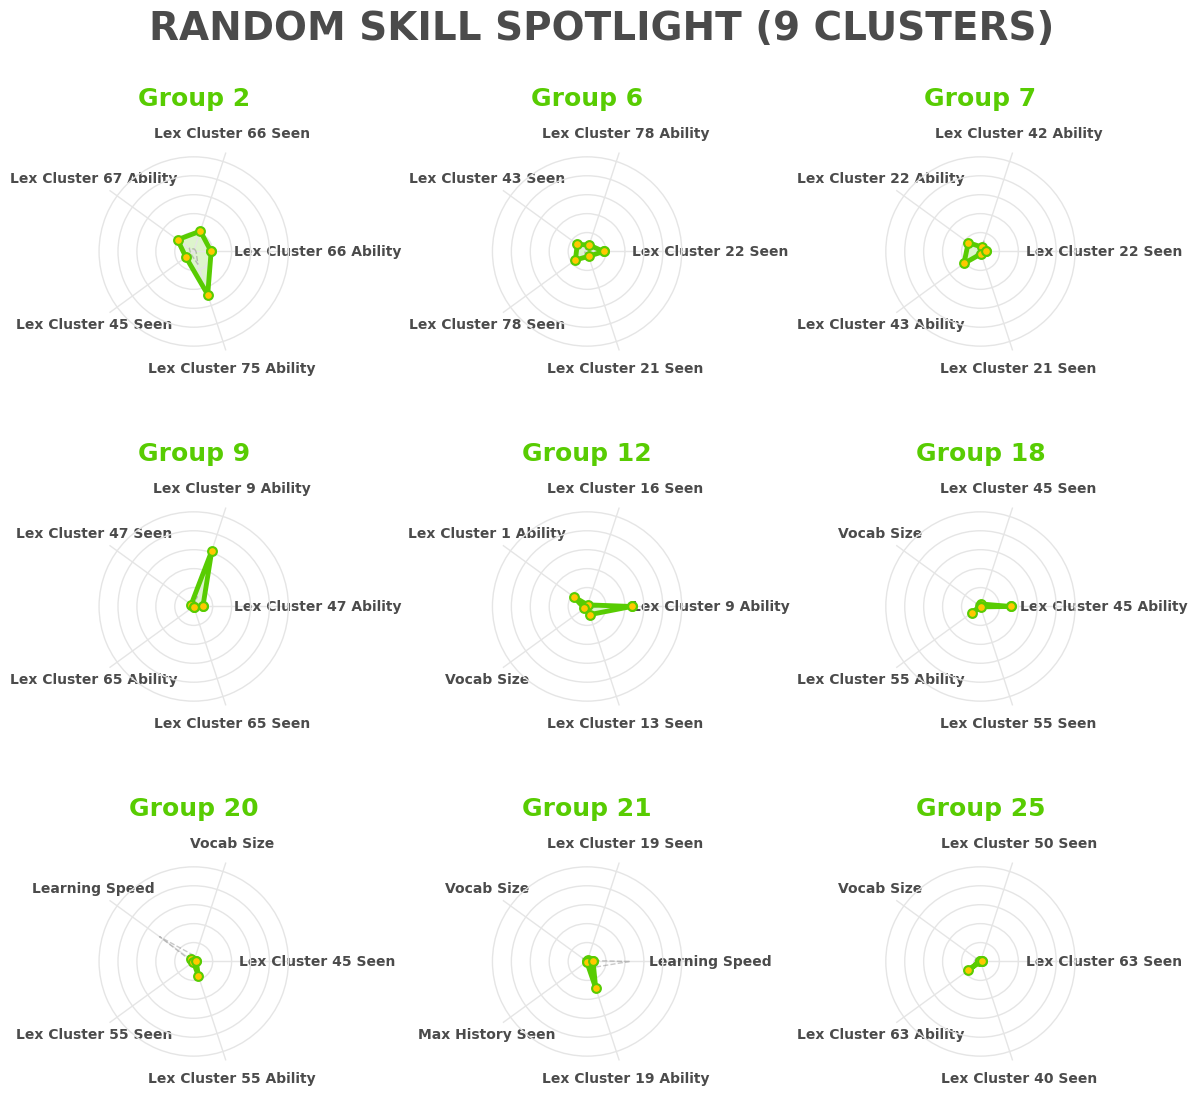

In [6]:
from src.evaluation.visualize import plot_cluster_top_features_radar, plot_all_clusters_radar_grid, plot_random_9_clusters_radar
plot_random_9_clusters_radar(processed_df, importance_dict)

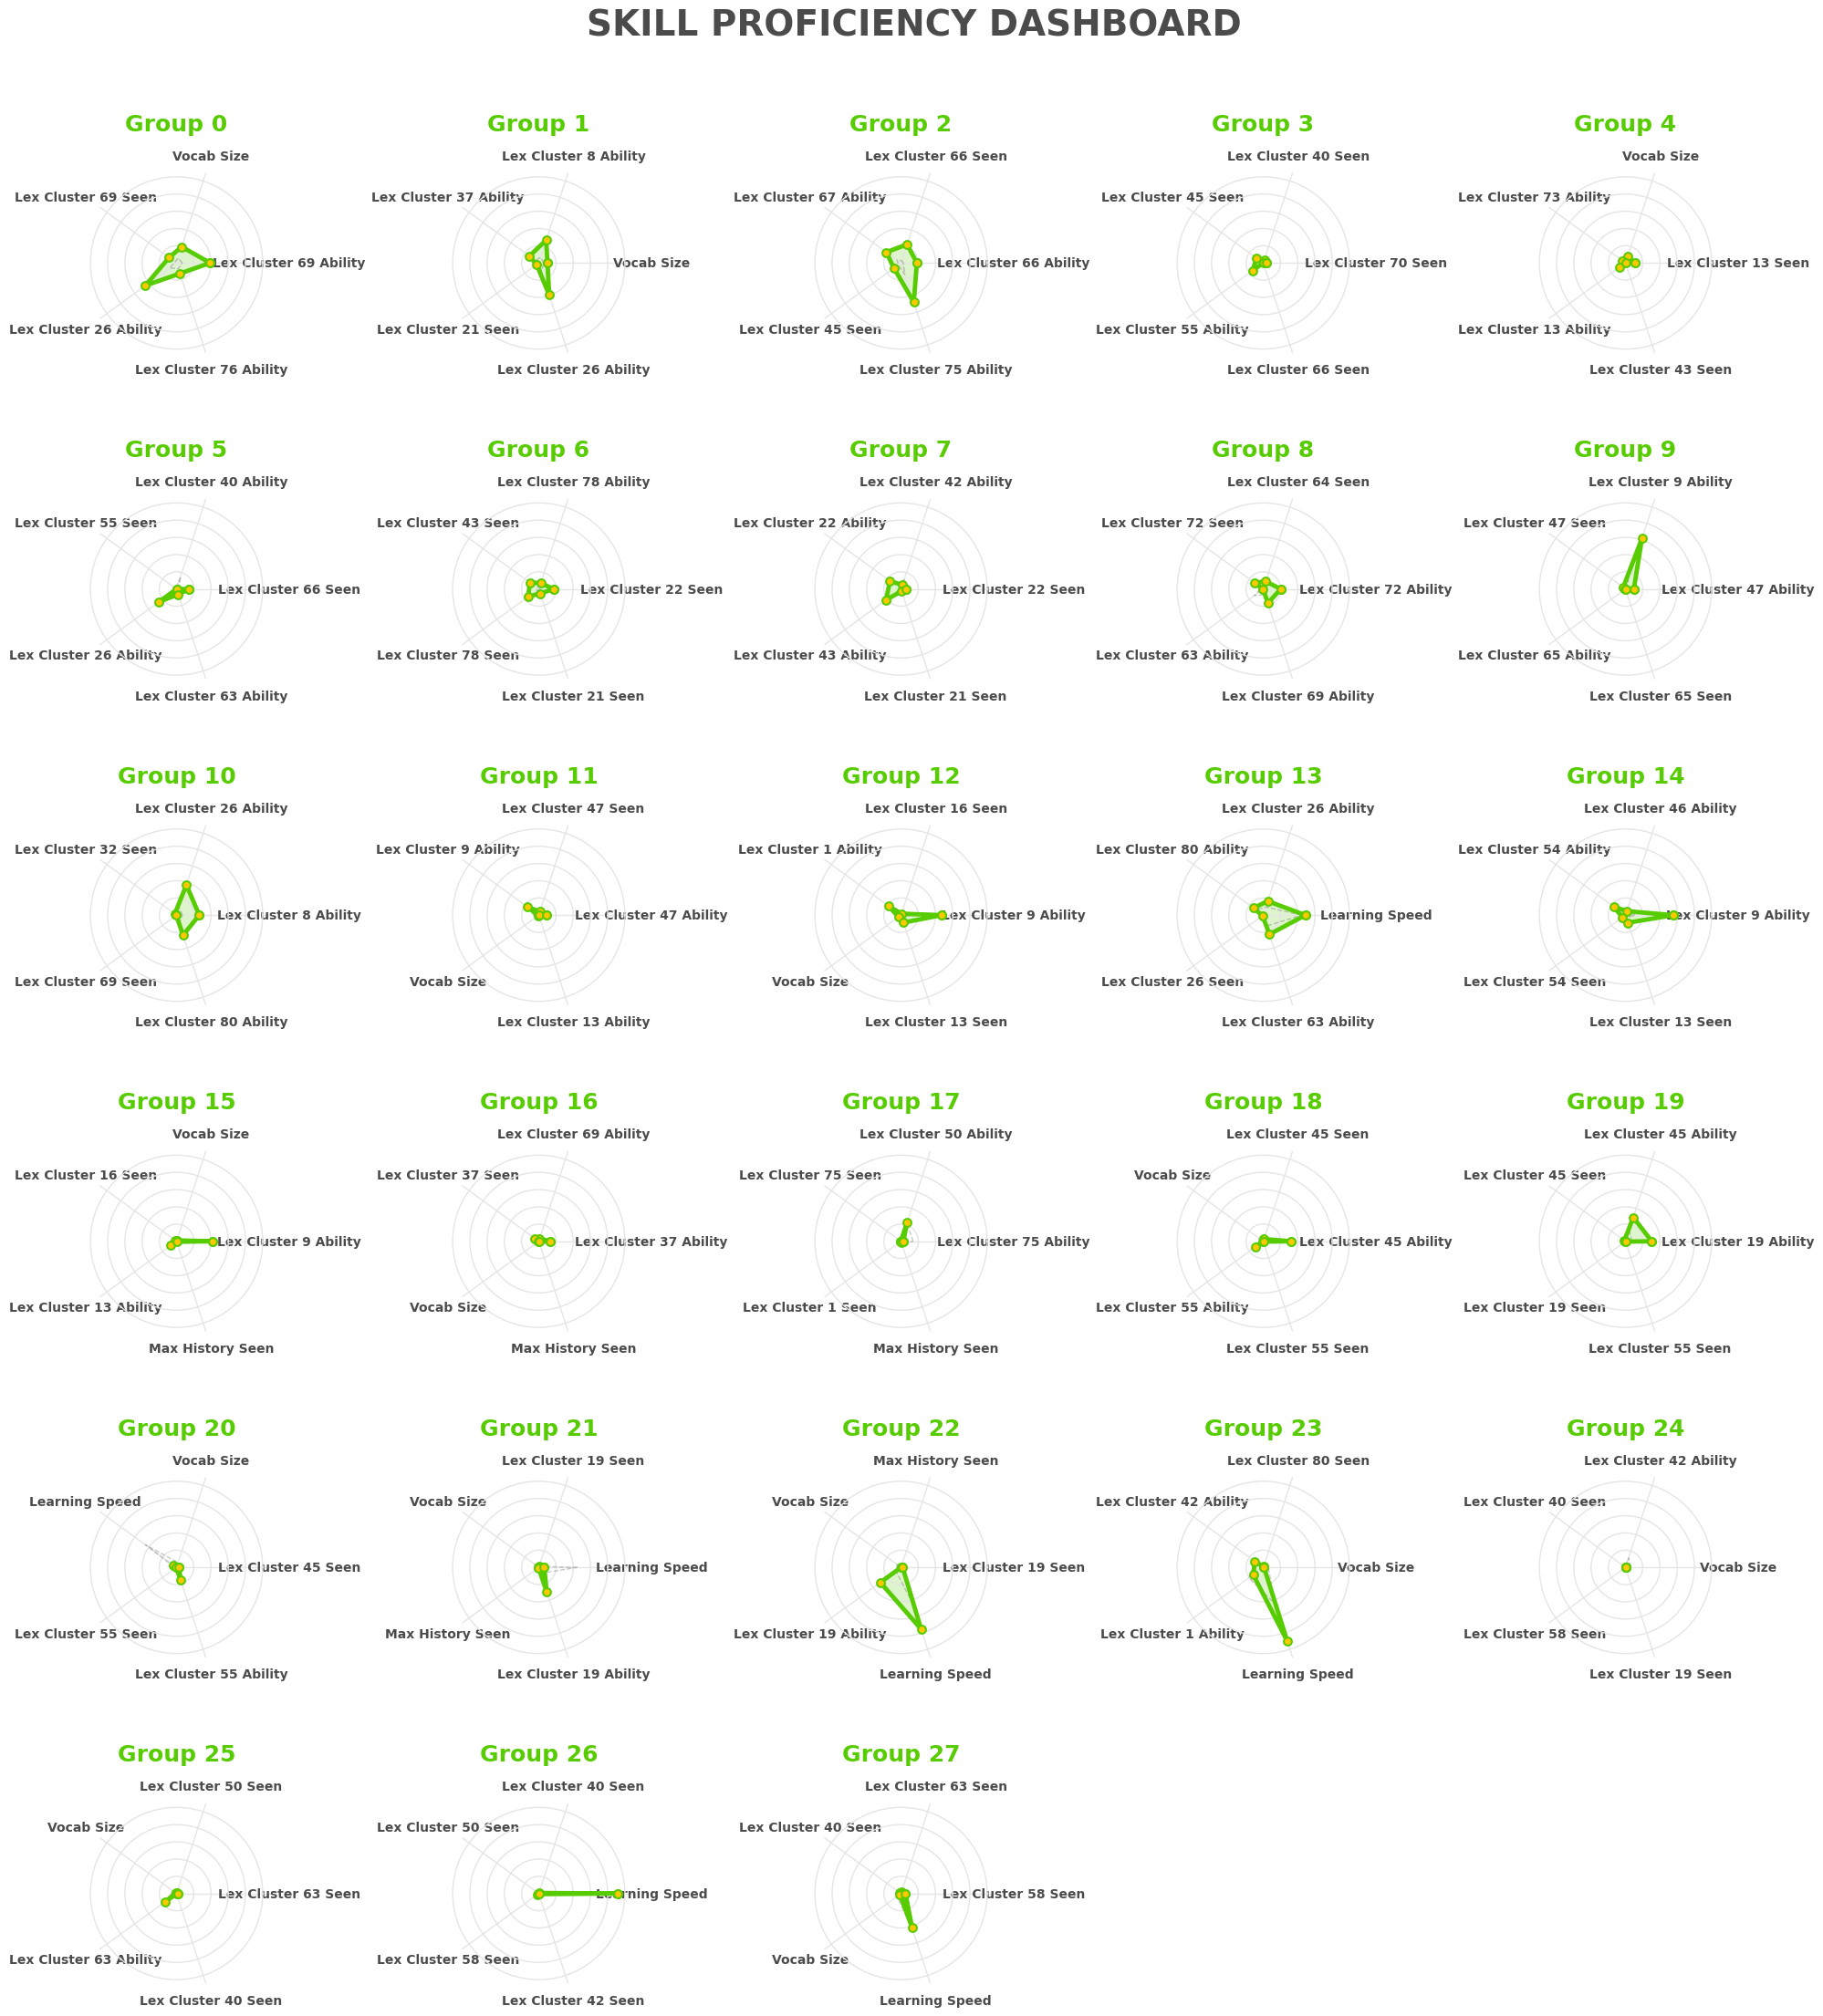

In [7]:
plot_all_clusters_radar_grid(processed_df, importance_dict)

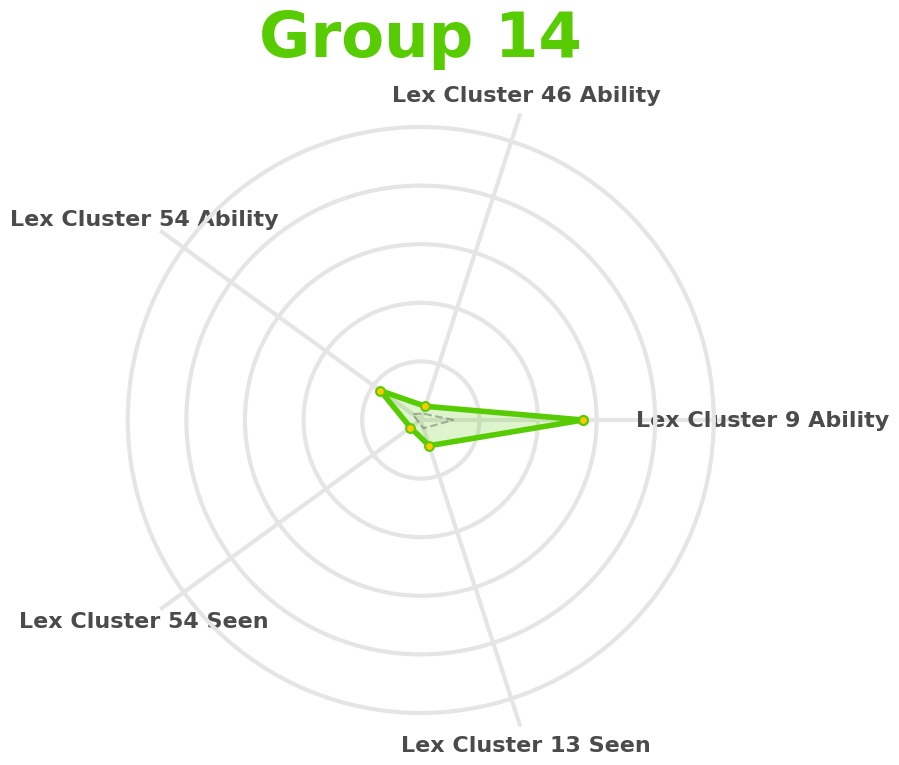

In [16]:
plot_cluster_top_features_radar(processed_df, 14, importance_dict)

---


--- Processing: svd_B ---


/Users/andy/anaconda3/envs/datathon/lib/python3.9/site-packages/hdbscan/prediction.py:663: RuntimeWarning: invalid value encountered in scalar divide
  in_cluster_probs = all_points_prob_in_some_cluster(


Original Noise: 1281 (47.29%)
Soft Clustering has re-assigned all points to 44 clusters.
Saved results for svd_B to '../data/tmp/hdbscan/' folder.


/Users/andy/anaconda3/envs/datathon/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Volumes/andy_SSD/KUL/Datathon_Duolingo/duolingo_datathon/notebooks/../src/evaluation/visualize.py:77: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  


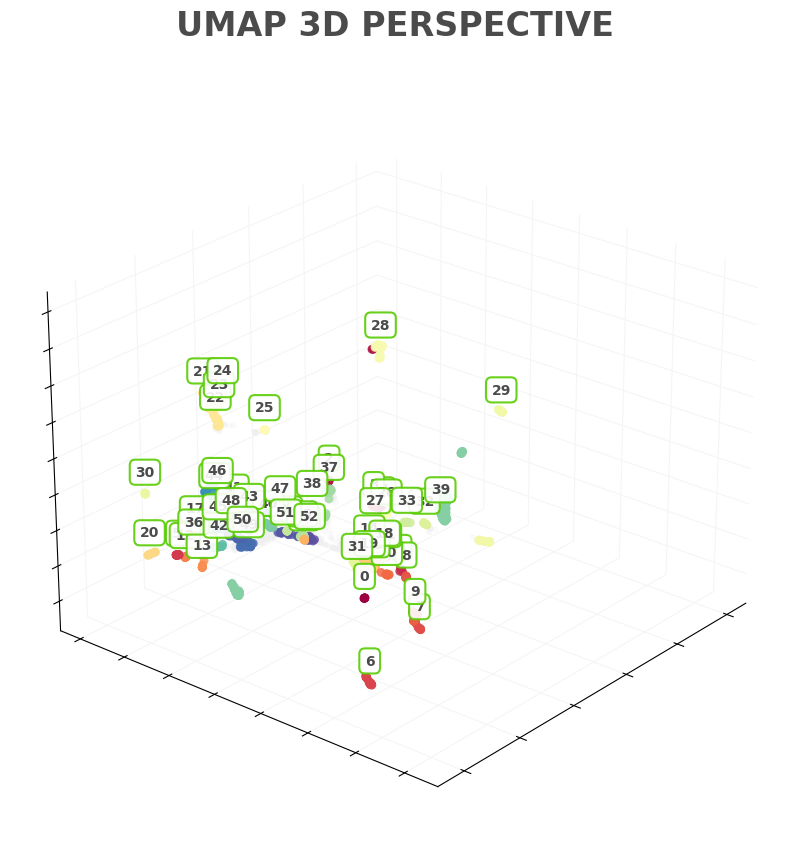

In [ ]:
from src.models.HDBSCAN import run_hdbscan_pipeline, save_clustering_results, get_all_cluster_importances
from src.evaluation.visualize import visualize_hdbscan_with_labels, plot_cluster_top_features_boxplot, plot_cluster_top_features_radar, visualize_hdbscan_3d, create_rotating_3d_video

datasets = {
    # "baseline": df_base, 
    # "svd": df_1a, 
    "svd_B": df_1b,
    # "svd512_ae128": df_2a, 
    # "svd512_ae128_B": df_2b,
    # "lex_clusters_B": df_3,
}

# df_train = df_3.sample(frac=0.8)
# df_test = df_3.loc[~df_3.index.isin(df_train.index)]

# datasets = {
#     # "test": df_test,
#     "train": df_train
# }


for name, df in datasets.items():
    print(f"\n--- Processing: {name} ---")
    
    # For the high-dim set, we ensure PCA/UMAP is used
    processed_df, model = run_hdbscan_pipeline(df.reset_index(), n_components=min(df.shape[1],200),
                                               epsilon=0.2, min_cluster_size=8, min_samples=2)
    
    save_clustering_results(processed_df, model, name, "../data/tmp/hdbscan")

    feature_cols = [c for c in processed_df.columns if c not in ['user_id', 'cluster_label', 'cluster_probability', 'soft_cluster_label', 'soft_cluster_score']]
    importance_dict = get_all_cluster_importances(processed_df, feature_cols)

    # processed_df.loc[(processed_df['cluster_label'] <0) & (processed_df['soft_cluster_score'] >0.037981), 'cluster_label'] = \
    #     processed_df.loc[(processed_df['cluster_label']) <0 & (processed_df['soft_cluster_score'] >0.037981), 'soft_cluster_label']

    visualize_hdbscan_3d(processed_df, model, name, "../data/tmp/hdbscan/plots")

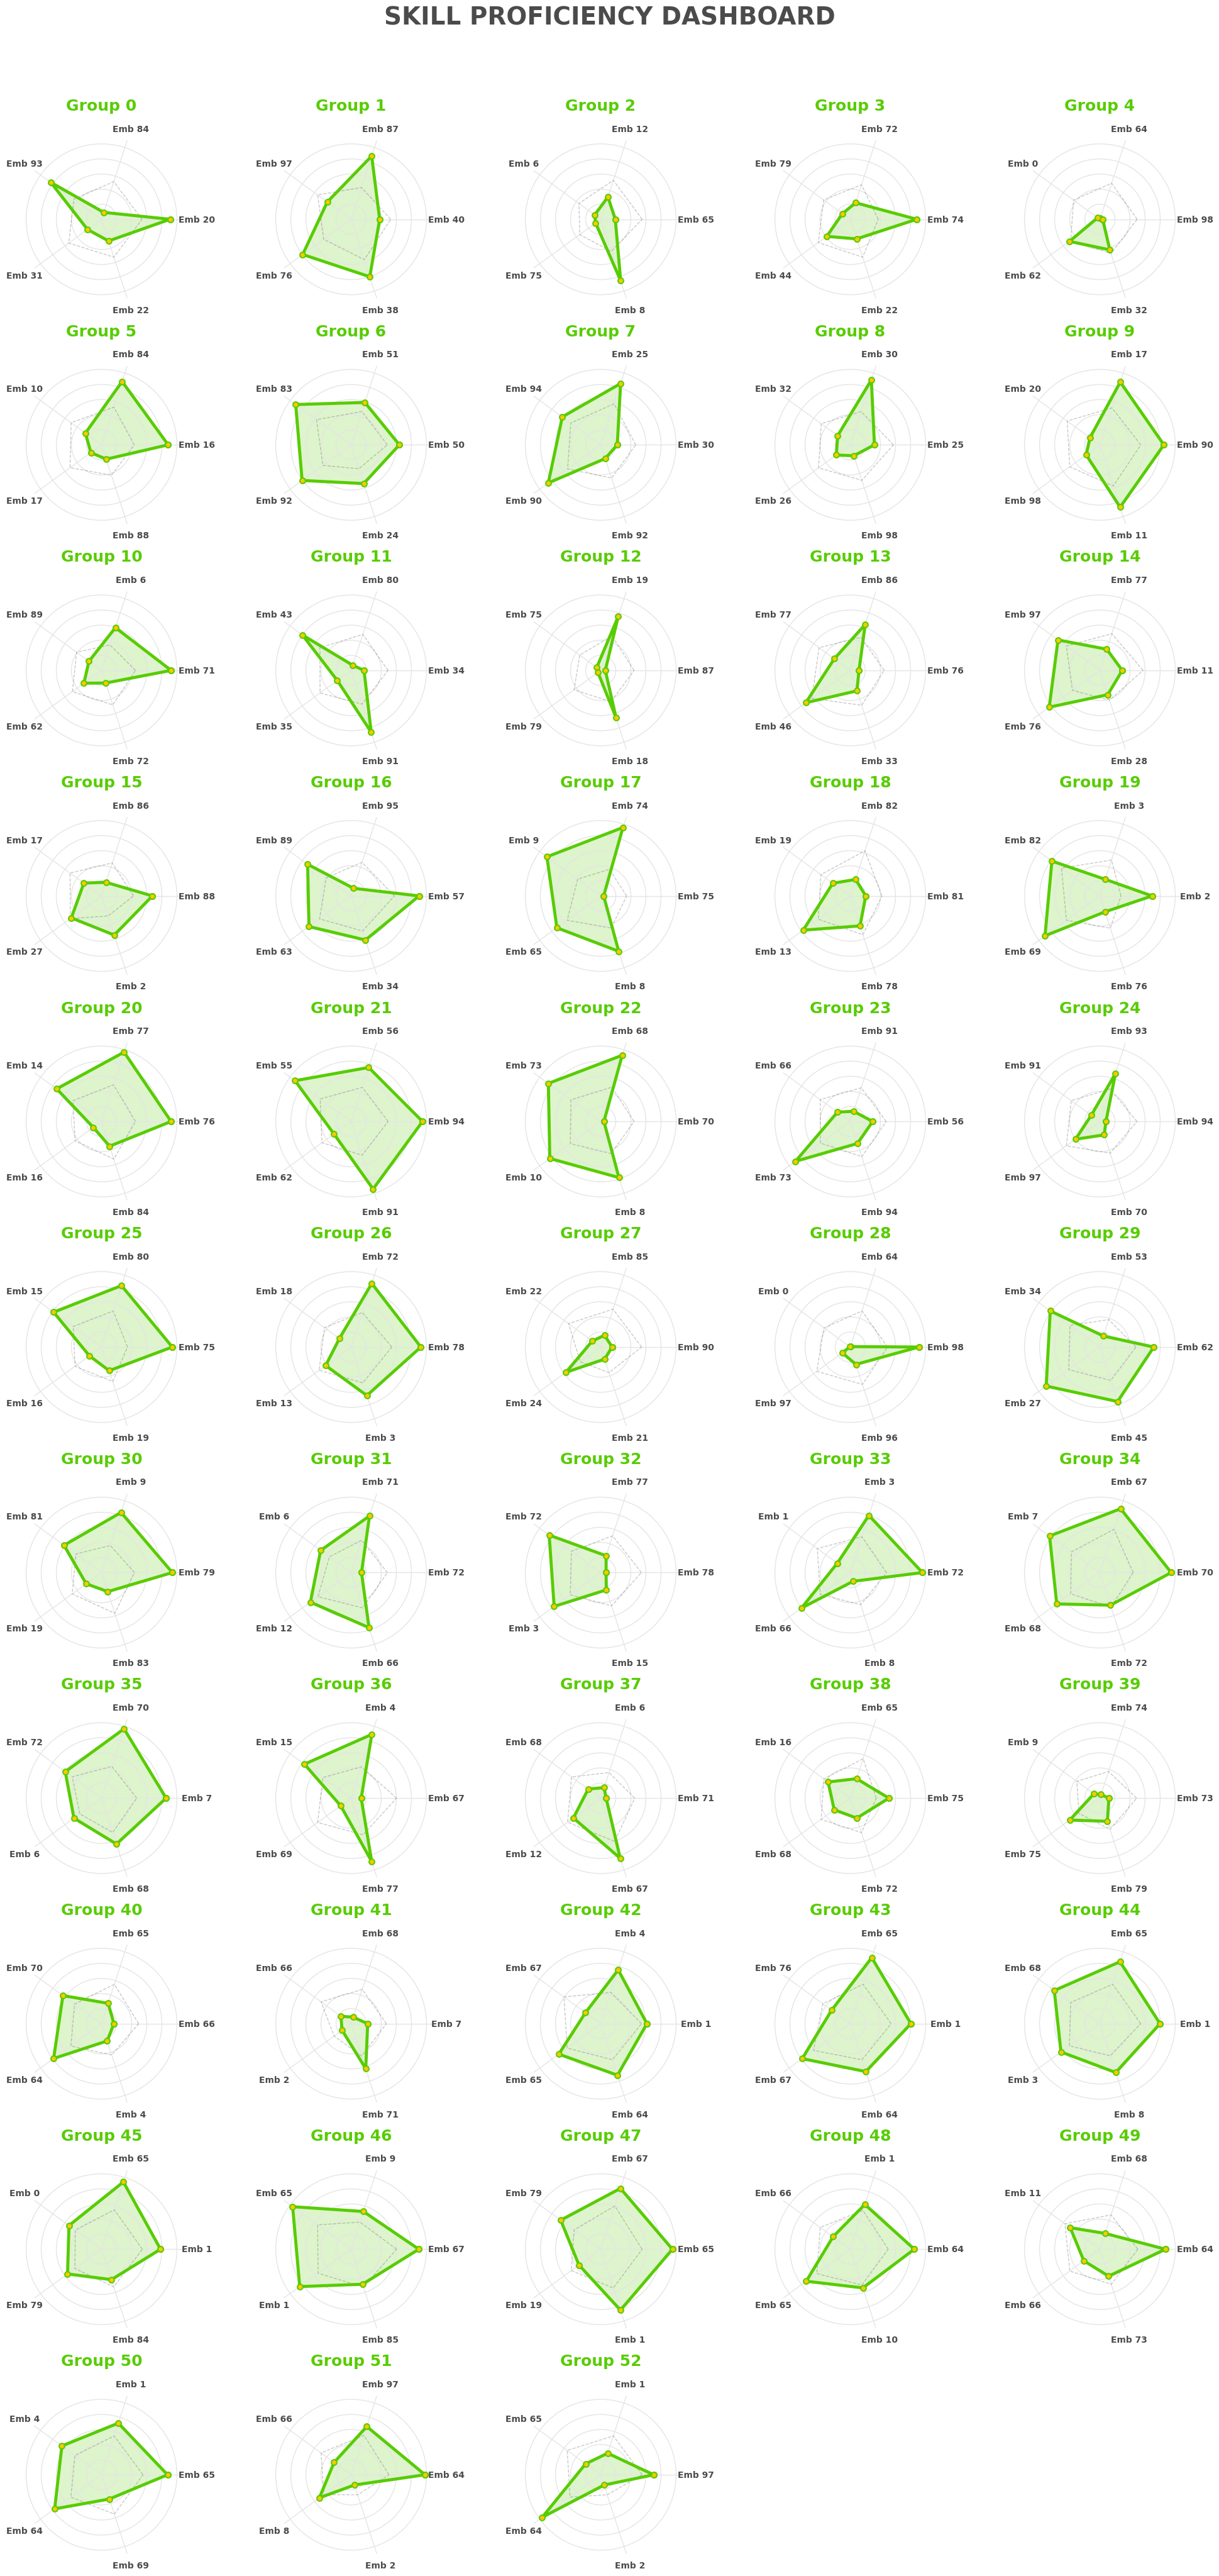

In [55]:
from src.evaluation.visualize import plot_cluster_top_features_radar, plot_all_clusters_radar_grid
plot_all_clusters_radar_grid(processed_df, importance_dict)

---


--- Processing: svd512_ae128_B ---


/Users/andy/anaconda3/envs/datathon/lib/python3.9/site-packages/hdbscan/prediction.py:663: RuntimeWarning: invalid value encountered in scalar divide
  in_cluster_probs = all_points_prob_in_some_cluster(


Original Noise: 1669 (61.61%)
Soft Clustering has re-assigned all points to 32 clusters.
Saved results for svd512_ae128_B to '../data/tmp/hdbscan/' folder.


/Users/andy/anaconda3/envs/datathon/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Volumes/andy_SSD/KUL/Datathon_Duolingo/duolingo_datathon/notebooks/../src/evaluation/visualize.py:77: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  


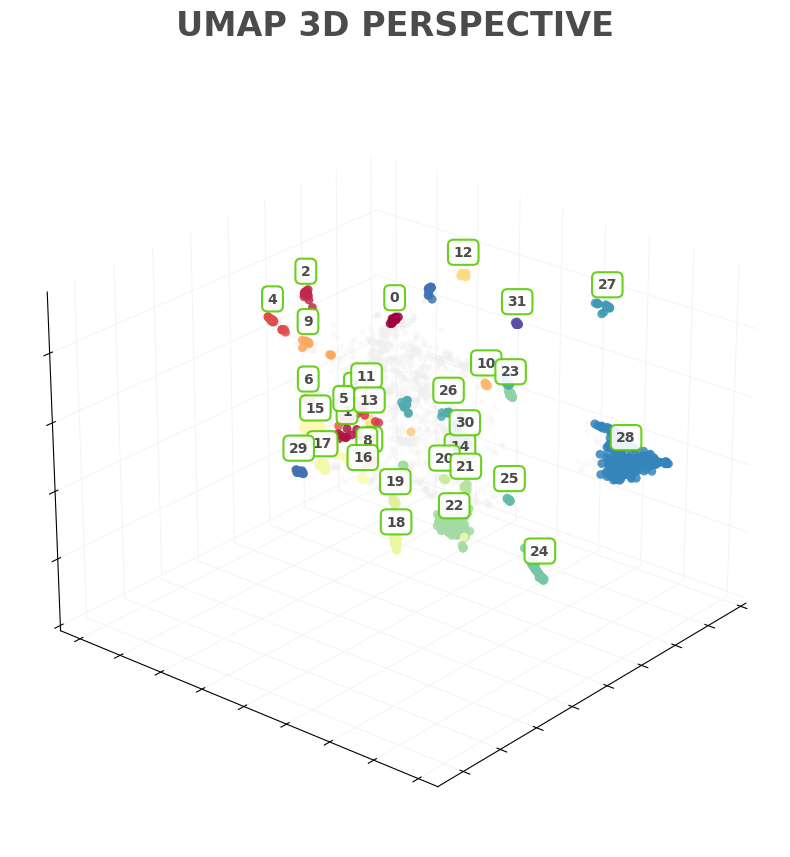

In [56]:
from src.models.HDBSCAN import run_hdbscan_pipeline, save_clustering_results, get_all_cluster_importances
from src.evaluation.visualize import visualize_hdbscan_with_labels, plot_cluster_top_features_boxplot, plot_cluster_top_features_radar, visualize_hdbscan_3d

datasets = {
    # "baseline": df_base, 
    # "svd": df_1a, 
    # "svd_B": df_1b,
    # "svd512_ae128": df_2a, 
    "svd512_ae128_B": df_2b,
    # "lex_clusters_B": df_3,
}

# df_train = df_3.sample(frac=0.8)
# df_test = df_3.loc[~df_3.index.isin(df_train.index)]

# datasets = {
#     # "test": df_test,
#     "train": df_train
# }


for name, df in datasets.items():
    print(f"\n--- Processing: {name} ---")
    
    # For the high-dim set, we ensure PCA/UMAP is used
    processed_df, model = run_hdbscan_pipeline(df.reset_index(), n_components=min(df.shape[1],200),
                                               epsilon=0.2, min_cluster_size=8, min_samples=2)
    
    save_clustering_results(processed_df, model, name, "../data/tmp/hdbscan")

    feature_cols = [c for c in processed_df.columns if c not in ['user_id', 'cluster_label', 'cluster_probability', 'soft_cluster_label', 'soft_cluster_score']]
    importance_dict = get_all_cluster_importances(processed_df, feature_cols)

    # processed_df.loc[(processed_df['cluster_label'] <0) & (processed_df['soft_cluster_score'] >0.037981), 'cluster_label'] = \
    #     processed_df.loc[(processed_df['cluster_label']) <0 & (processed_df['soft_cluster_score'] >0.037981), 'soft_cluster_label']

    visualize_hdbscan_3d(processed_df, model, name, "../data/tmp/hdbscan/plots")

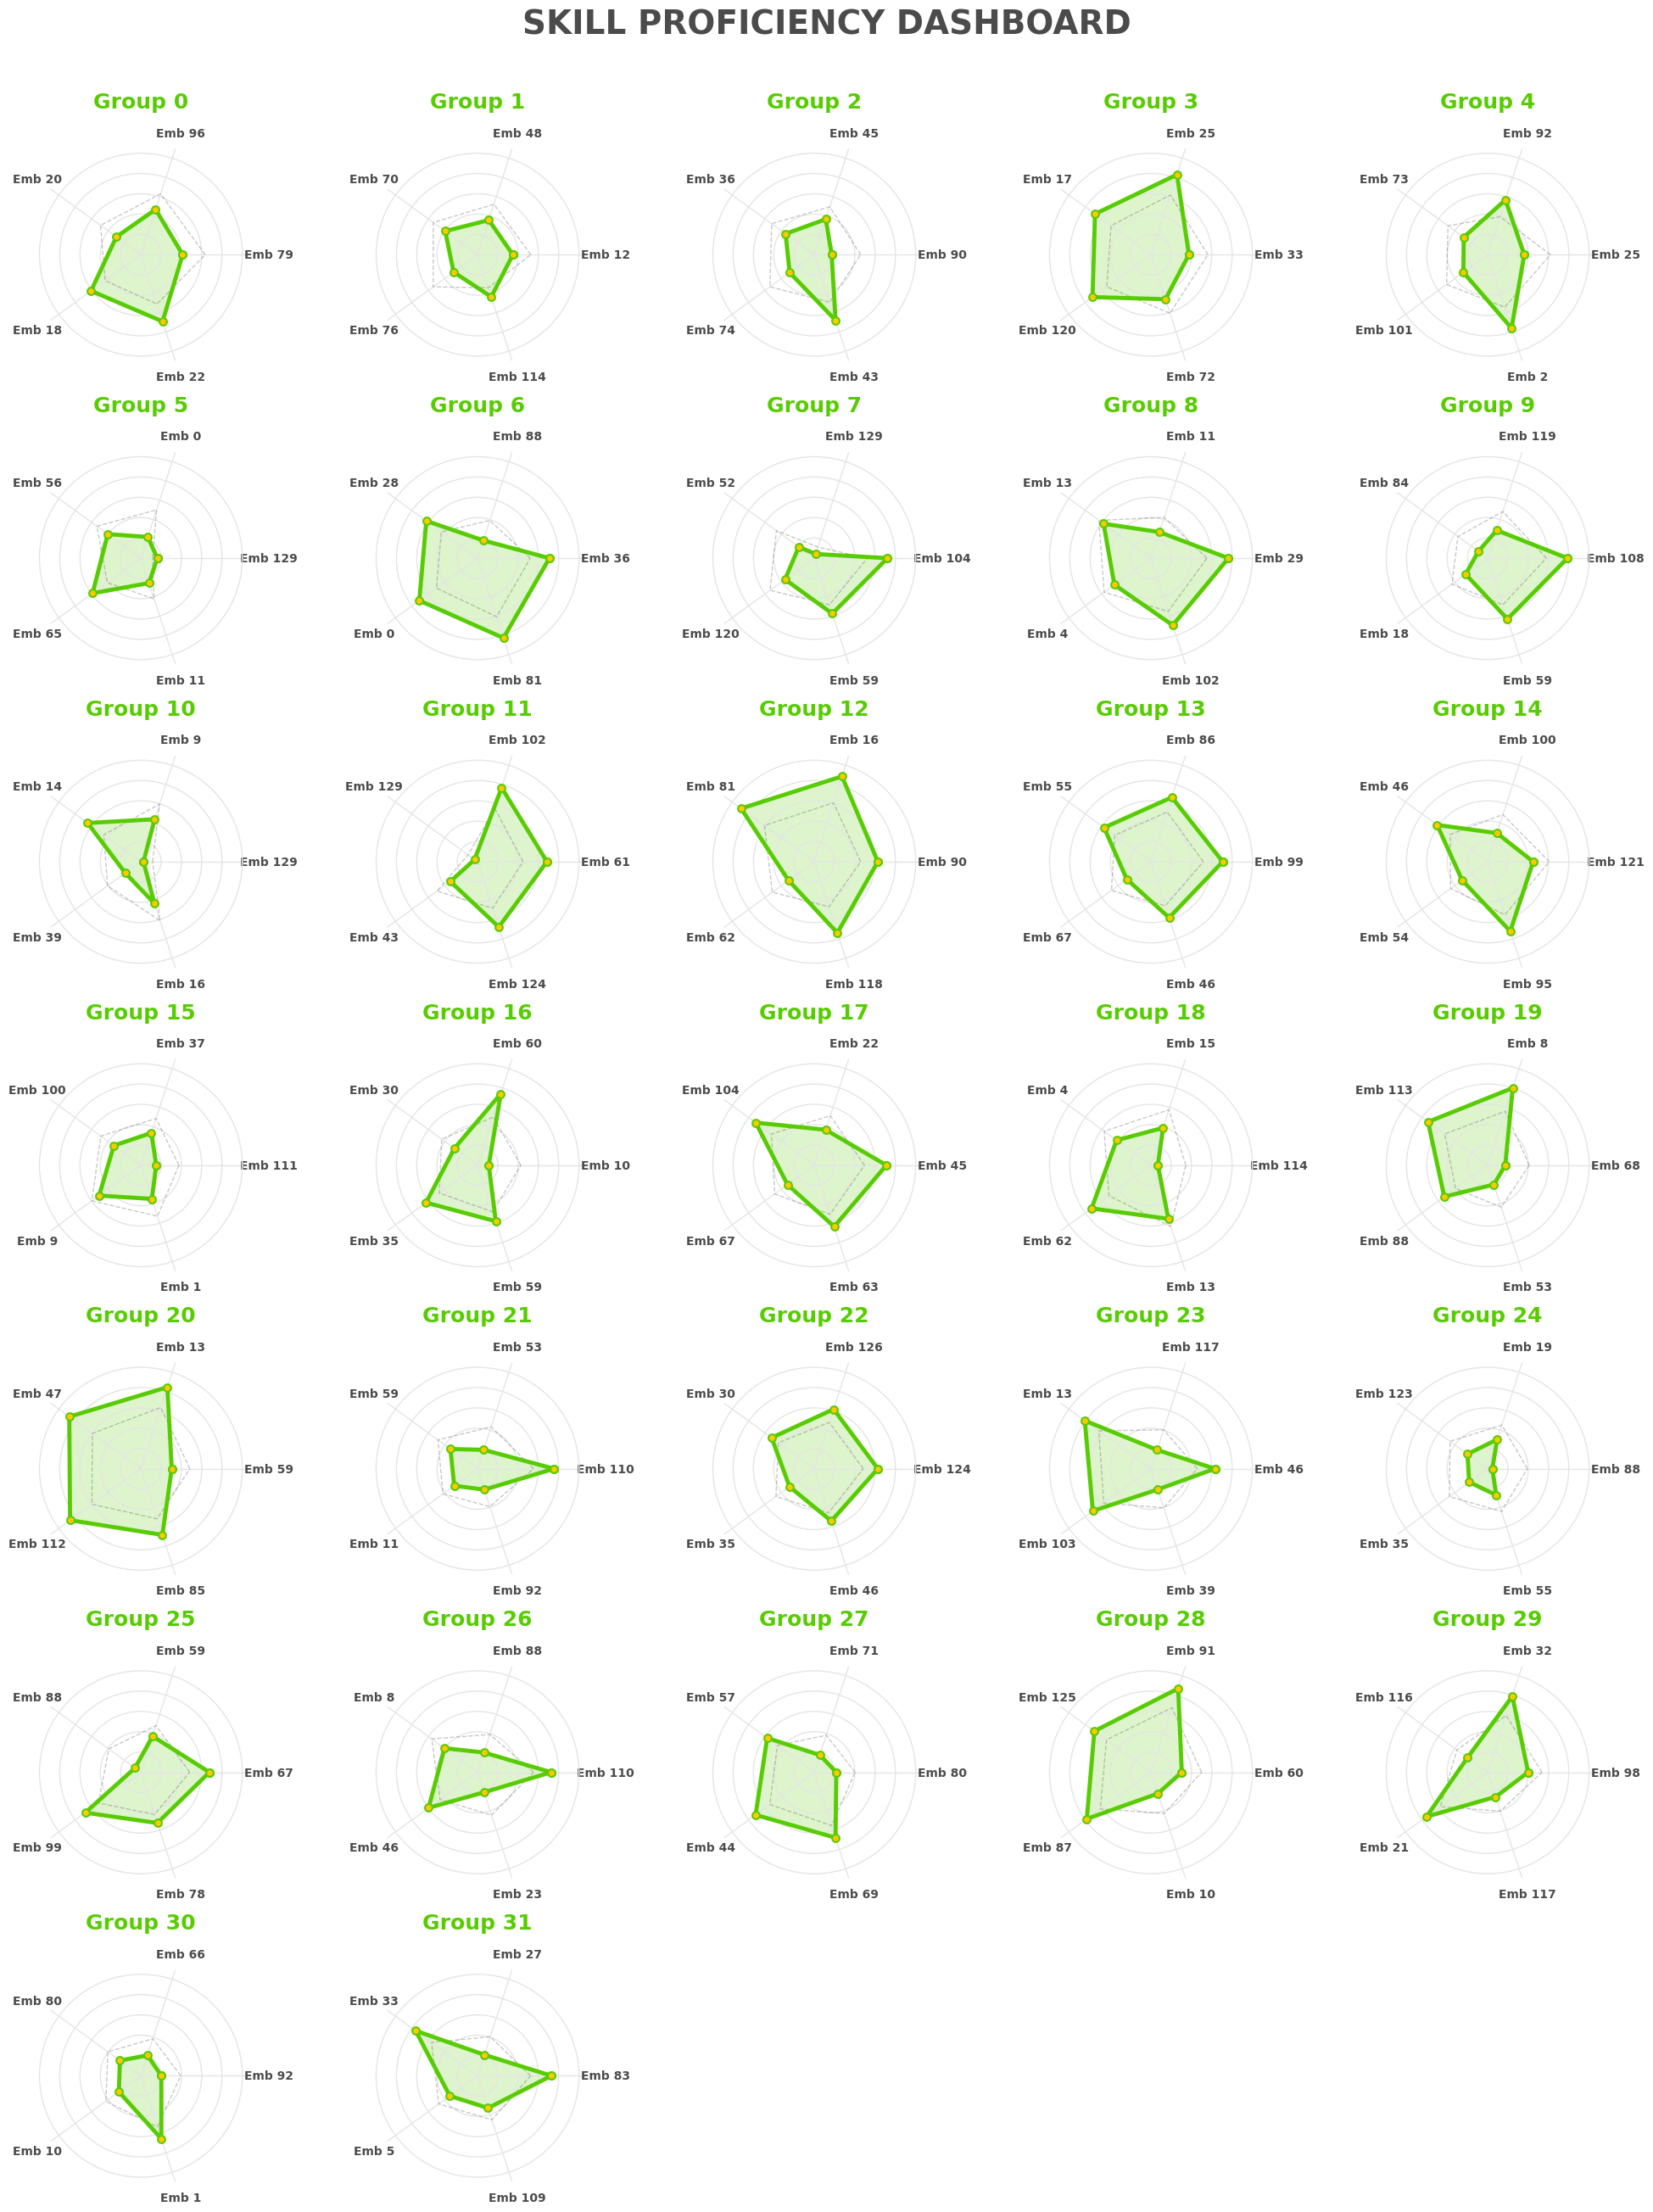

In [57]:
from src.evaluation.visualize import plot_cluster_top_features_radar, plot_all_clusters_radar_grid
plot_all_clusters_radar_grid(processed_df, importance_dict)